<a href="https://colab.research.google.com/github/RyazMax/Methods-and-models-of-Multivaritate-analysis/blob/main/1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://www.kaggle.com/rohanrao/air-quality-data-in-india
# https://classroom.google.com/c/Mzk3NDQ0MjUxNTQ4/m/NDAwNjA2ODEyODgz/details

import datetime as dt

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_raw = pd.read_csv('/content/drive/MyDrive/# ИТМО/M&M MSA/data/station_hour.csv', low_memory=False)
df_raw.head()

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24 17:00:00,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.1,6.10,0.10,NaN,NaN
1,AP001,2017-11-24 18:00:00,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.1,6.25,0.15,NaN,NaN
2,AP001,2017-11-24 19:00:00,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.2,5.98,0.18,NaN,NaN
3,AP001,2017-11-24 20:00:00,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,0.2,6.72,0.10,NaN,NaN
4,AP001,2017-11-24 21:00:00,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,0.2,5.75,0.08,NaN,NaN


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2589083 entries, 0 to 2589082
Data columns (total 16 columns):
 #   Column      Dtype  
---  ------      -----  
 0   StationId   object 
 1   Datetime    object 
 2   PM2.5       float64
 3   PM10        float64
 4   NO          float64
 5   NO2         float64
 6   NOx         float64
 7   NH3         float64
 8   CO          float64
 9   SO2         float64
 10  O3          float64
 11  Benzene     float64
 12  Toluene     float64
 13  Xylene      float64
 14  AQI         float64
 15  AQI_Bucket  object 
dtypes: float64(13), object(3)
memory usage: 316.1+ MB


## Step 1. Choose subsample with main variables for your further analysis

---



Let's look at the top not-none features.

The top-2 filled continuous variables + AQI_Bucket are chosen as features (plus datetime and station). 

[Air Quality Index calculation](https://www.kaggle.com/rohanrao/calculating-aqi-air-quality-index-tutorial?scriptVersionId=41199538)

Even after aggregation we will leave it as a discrete value just for example.

In [ ]:
df_raw.isna().sum().sort_values().head(10).index.tolist()

['StationId',
 'Datetime',
 'NOx',
 'CO',
 'NO2',
 'NO',
 'AQI',
 'AQI_Bucket',
 'PM2.5',
 'O3']

In [ ]:
features = ['StationId', 'Datetime', 'NOx', 'NO', 'NO2', 'AQI']
continuous_vars =  ['NOx', 'NO', 'NO2', 'AQI']

In [ ]:
df = df_raw[features].dropna()
df.reset_index(drop=True, inplace=True)

# df_subs.drop('Datetime', axis=1, inplace=True)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1807784 entries, 0 to 1807783
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   StationId  object 
 1   Datetime   object 
 2   NOx        float64
 3   NO         float64
 4   NO2        float64
 5   AQI        float64
dtypes: float64(4), object(2)
memory usage: 82.8+ MB
None


Next, let's leave out the `StationID` to see the general trend over time.

In [ ]:
# df.drop('StationId', axis=1, inplace=True)  # - no need, it is dropped implicitly by the aggregation
df = df.groupby('Datetime', as_index=False).mean()
df.head()

,Datetime,NOx,NO,NO2,AQI
0,2015-01-01 16:00:00,43.905,14.805,30.210,456.5
1,2015-01-01 17:00:00,44.820,15.510,31.250,450.0
2,2015-01-01 18:00:00,47.145,18.270,30.825,446.5
3,2015-01-01 19:00:00,54.505,26.560,30.640,475.0
4,2015-01-01 20:00:00,57.805,31.295,29.655,480.0


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48162 entries, 0 to 48161
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  48162 non-null  object 
 1   NOx       48162 non-null  float64
 2   NO        48162 non-null  float64
 3   NO2       48162 non-null  float64
 4   AQI       48162 non-null  float64
dtypes: float64(4), object(1)
memory usage: 2.2+ MB
None



## Step 2. Make a non-parametric estimation of PDF in form of histogram and using kernel density function

### Histograms


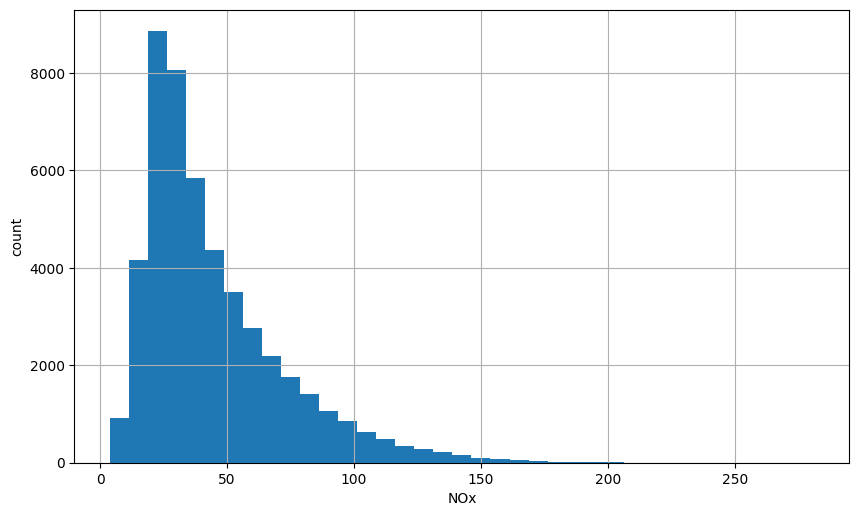

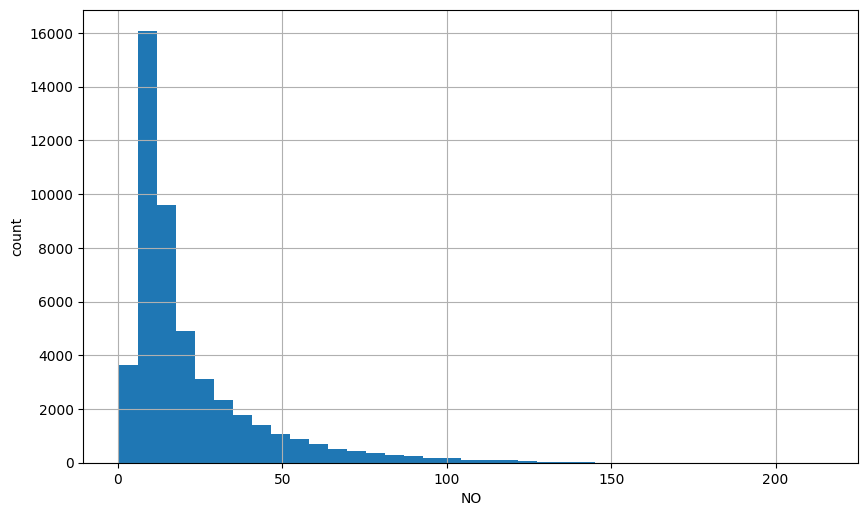

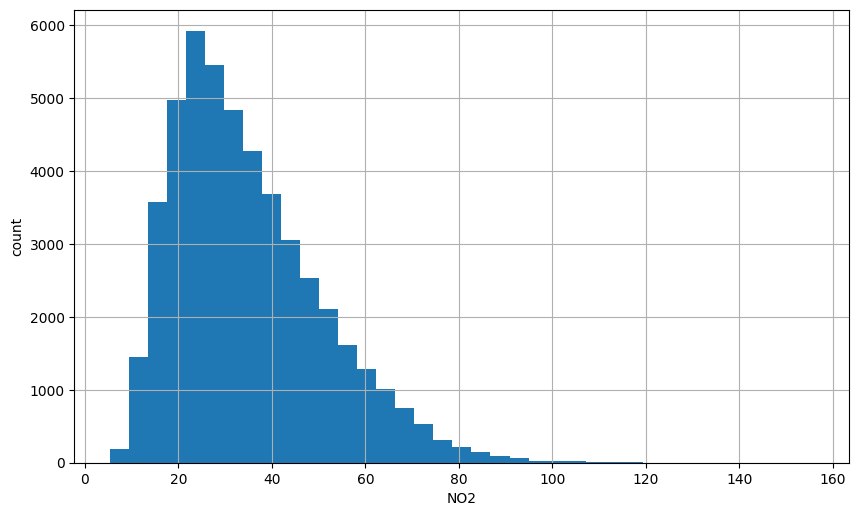

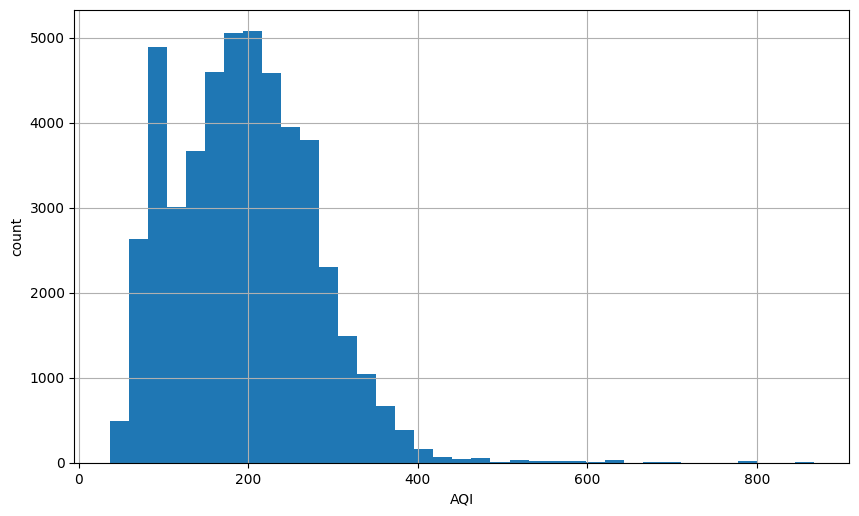

In [ ]:
bins=round(1 + 3.32*np.log(df.shape[0]))

for var in continuous_vars:
    plt.figure(dpi=100, figsize=[10, 6])
    plt.grid()
    plt.xlabel(var)
    plt.ylabel(f'count')
    if var in continuous_vars:
      plt.hist(df[var], bins=bins)
    else:
      y = df[var].value_counts()
      x = y.index
      plt.bar(x, y)


### KDE


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

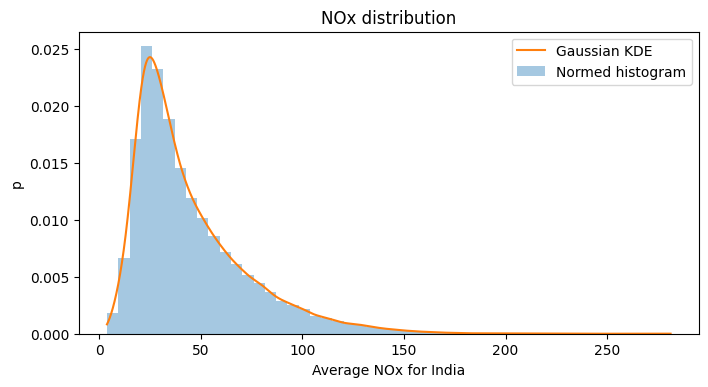

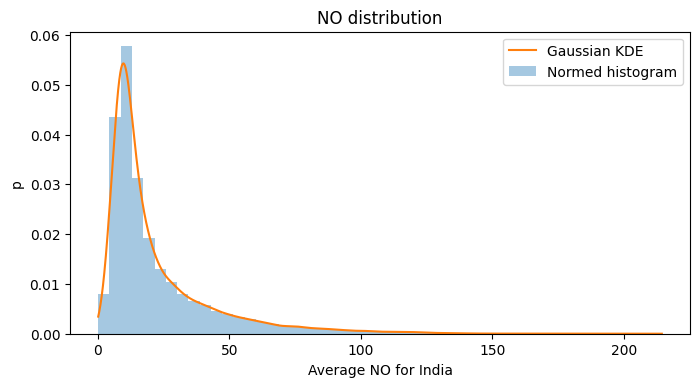

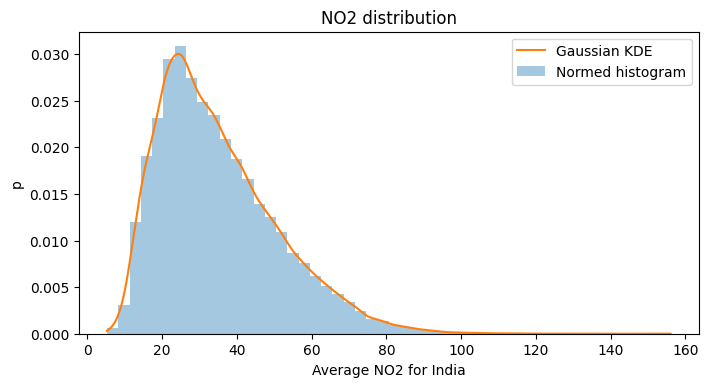

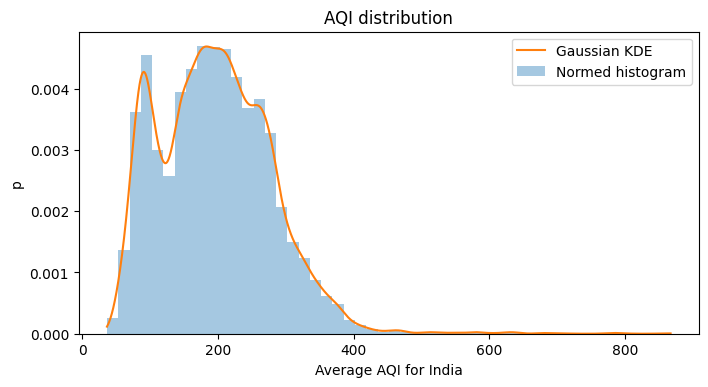

In [ ]:
if 'kde_dict' not in locals():
  kde_dict = {}

for i, var in enumerate(continuous_vars):
  fig = plt.figure()
  fig.set_dpi(100)
  fig.set_figheight(4)
  fig.set_figwidth(8)

  kernel = scipy.stats.gaussian_kde(df[var])

  min_amount, max_amount = df[var].min(), df[var].max()
  x = np.linspace(min_amount, max_amount, len(df))
  if var in kde_dict:
    kde_values = kde_dict[var]
  else:
    kde_values = kernel(x)
    kde_dict[var] = kde_values

  sns.distplot(df[var], kde=False, norm_hist=True, label=f'Normed histogram')
  plt.plot(x, kde_values, label='Gaussian KDE')

  plt.title(f'{var} distribution')
  plt.ylabel('p')
  plt.xlabel(f'Average {var} for India')
  plt.legend()
  

## Step 3. Make an estimation of order statistics and represent them as “box with whiskers” plot.



In [ ]:
descr = df[continuous_vars].describe().round(2)
descr

,NOx,NO,NO2,AQI
count,48162.00,48162.00,48162.00,48162.00
mean,44.70,21.94,34.91,195.91
std,27.99,20.92,15.89,83.02
min,3.75,0.18,5.28,36.60
25%,24.71,9.16,22.93,134.41
50%,36.18,13.87,31.84,192.45
75%,57.39,26.69,44.18,251.02
max,281.29,214.45,156.02,867.33


In [ ]:
print(descr.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &       NOx &        NO &       NO2 &       AQI \\
\midrule
count &  48162.00 &  48162.00 &  48162.00 &  48162.00 \\
mean  &     44.70 &     21.94 &     34.91 &    195.91 \\
std   &     27.99 &     20.92 &     15.89 &     83.02 \\
min   &      3.75 &      0.18 &      5.28 &     36.60 \\
25\%   &     24.71 &      9.16 &     22.93 &    134.41 \\
50\%   &     36.18 &     13.87 &     31.84 &    192.45 \\
75\%   &     57.39 &     26.69 &     44.18 &    251.02 \\
max   &    281.29 &    214.45 &    156.02 &    867.33 \\
\bottomrule
\end{tabular}



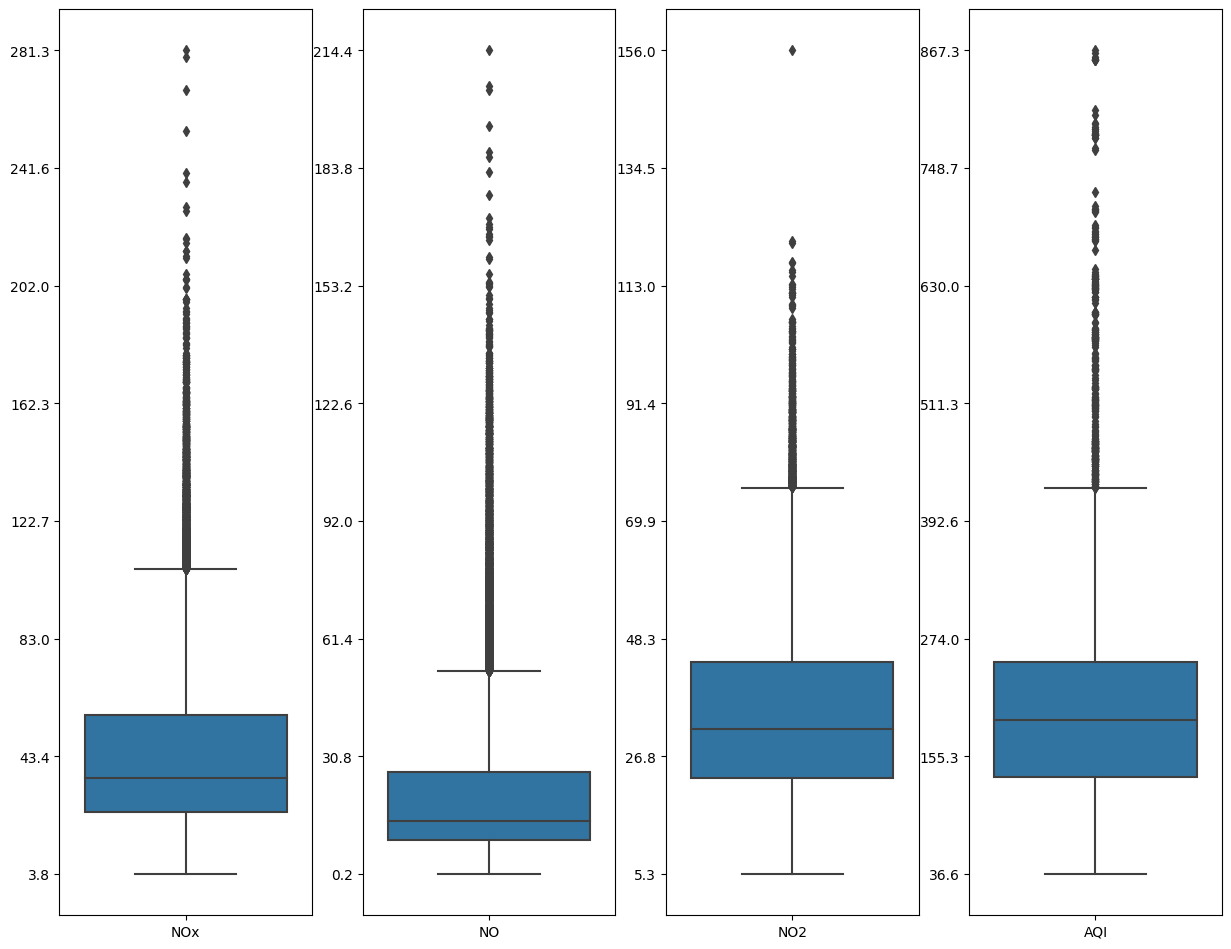

In [ ]:
fig, axs = plt.subplots(1, len(continuous_vars))
fig.set_figheight(12)
fig.set_figwidth(15)
fig.set_dpi(100)

for i, var in enumerate(continuous_vars):
  plot = sns.boxplot(data=df[[var]], ax=axs[i])
  # ticks = plot.get_xticks()
  plot.set_yticks(np.linspace(df[var].min(), df[var].max(), 8))
  # plot.grid()

Removed 1850 outliers (3.84%). 46312 samples left.


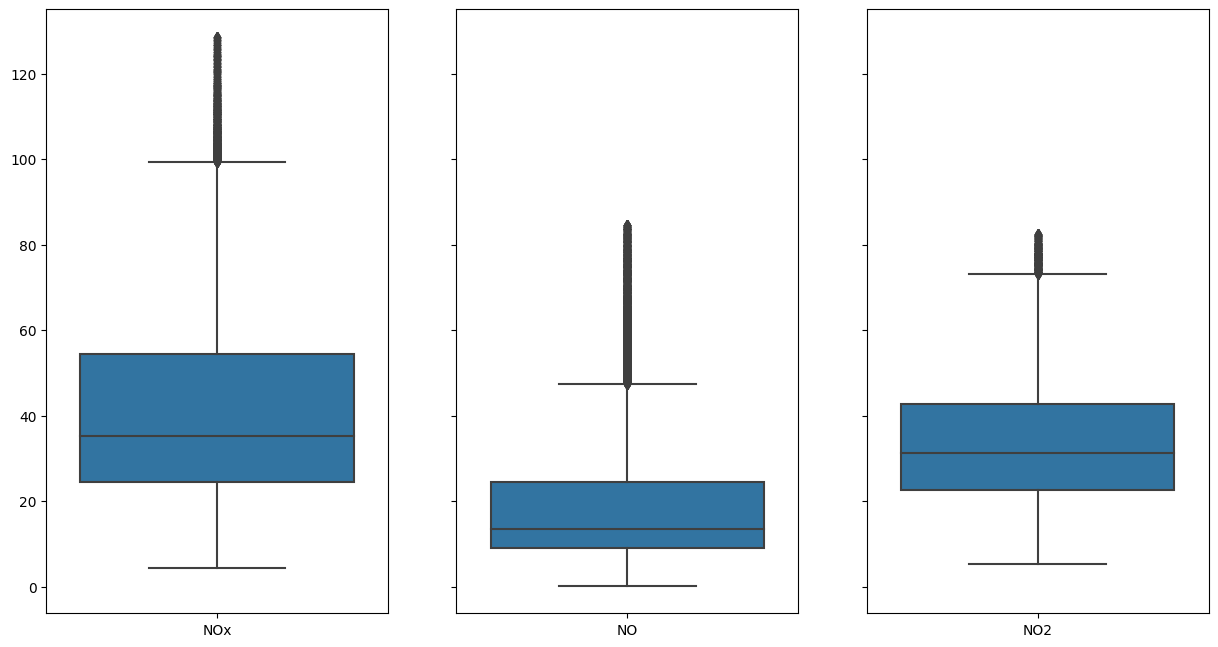

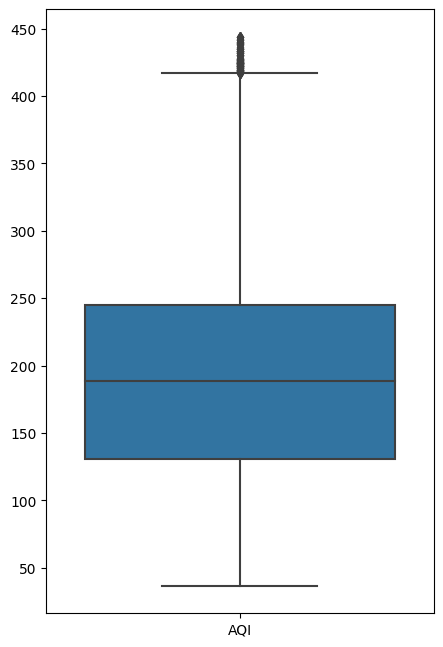

In [ ]:
from scipy.stats import zscore

z_scores = zscore(df[continuous_vars])
# calculate z-scores of `df`

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_no_outliers = df[filtered_entries]

removed = len(df)-len(df_no_outliers)

print(f'Removed {removed} outliers ({round(removed / len(df) * 100, 2)}%). '
  f'{len(df_no_outliers)} samples left.')


fig, axs = plt.subplots(1, len(continuous_vars)-1, sharey=True)
fig.set_figheight(8)
fig.set_figwidth(15)
fig.set_dpi(100)
for i, var in enumerate(continuous_vars[:-1]):
  plot = sns.boxplot(data=df_no_outliers[[var]], ax=axs[i])
  # ticks = plot.get_xticks()
  # plot.set_yticks(np.linspace(df_no_outliers[var].min(), df_no_outliers[var].max(), 8))

fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(5)
fig.set_dpi(100)
sns.boxplot(data=df_no_outliers[['AQI']])

## Step 4. Find one or several theoretical distributions that could describe your sample on a basis of non-parametric analysis results.



In [ ]:
df_mean = df[continuous_vars].mean()
df_mean

NOx     44.702391
NO      21.939140
NO2     34.912272
AQI    195.907441
dtype: float64

In [ ]:
df.AQI.var()

6891.812538823189

In [ ]:
df_var = df[continuous_vars].var()
df_var

NOx     783.364946
NO      437.798277
NO2     252.529979
AQI    6891.812539
dtype: float64

In [ ]:
alpha_mom = df_mean ** 2 / df_var
beta_mom = df_var / df_mean
alpha_mom, beta_mom

(NOx    2.550923
 NO     1.099424
 NO2    4.826622
 AQI    5.568887
 dtype: float64, NOx    17.524006
 NO     19.955125
 NO2     7.233273
 AQI    35.178922
 dtype: float64)

In [ ]:
lambda_mom = 1 / df_mean
lambda_mom

NOx    0.022370
NO     0.045581
NO2    0.028643
AQI    0.005104
dtype: float64

In [ ]:
mu_mom = df_mean
sigma_mom = np.sqrt(df_var)
mu_mom, sigma_mom

(NOx     44.702391
 NO      21.939140
 NO2     34.912272
 AQI    195.907441
 dtype: float64, NOx    27.988657
 NO     20.923630
 NO2    15.891192
 AQI    83.016941
 dtype: float64)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

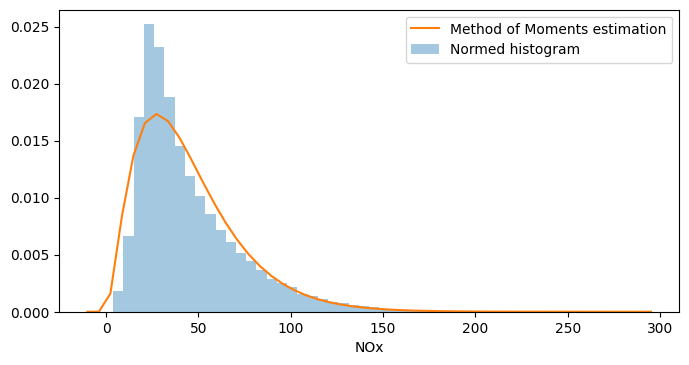

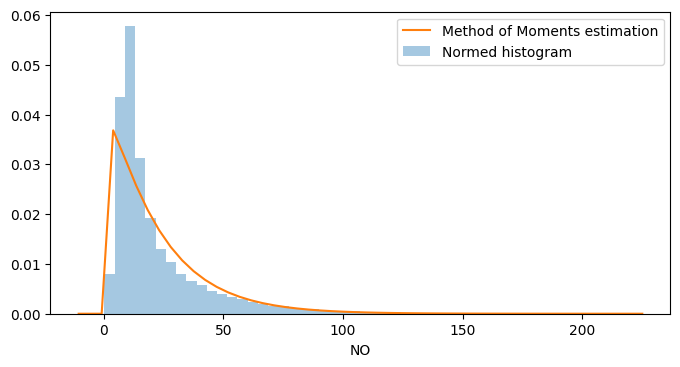

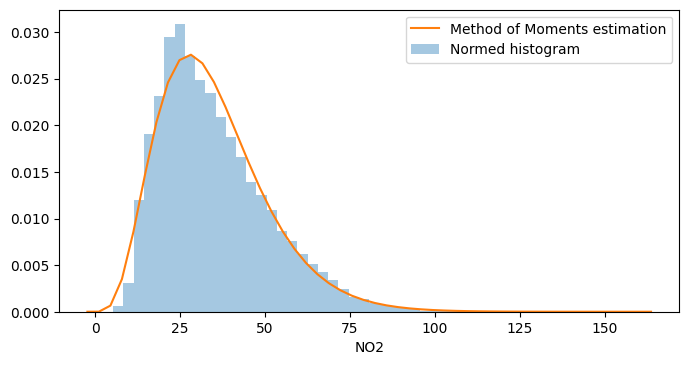

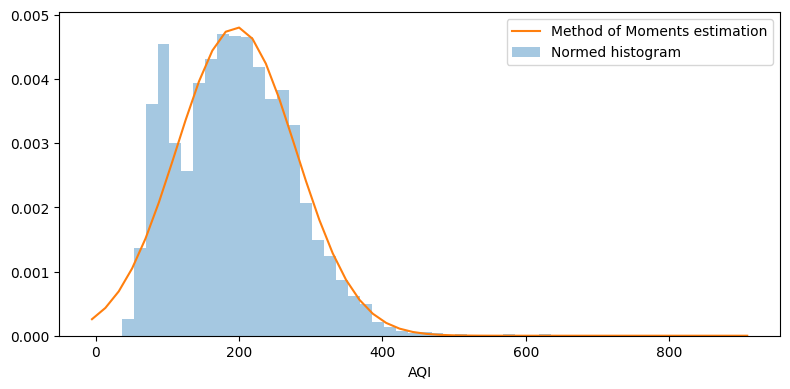

In [ ]:
from scipy.stats import gamma, expon, norm, lognorm

params_mom = {}

var_estim = {
    'NOx': {
        'estim': gamma,
        'params': {'a': alpha_mom['NOx'], 'scale': beta_mom['NOx']}
    },
    'NO': {
        'estim': gamma,
        'params': {'a': alpha_mom['NO'], 'scale': beta_mom['NO']}
    },
    # 'NOx': {
    #     'estim': expon,
    #     'params': {'scale': 1/lambda_mom['NOx']}
    # },
    # 'NO': {
    #     'estim': expon,
    #     'params': {'scale': 1/lambda_mom['NO']}
    # },
    # 'NOx': {
    #     'estim': lognorm,
    #     'params': {'s': np.log(df['NOx']).var(), 'scale': np.exp(np.log(df['NOx'])).mean()}
    # },
    # 'NO': {
    #     'estim': lognorm,
    #     'params': {'s': np.log(df['NO']).var(), 'scale': np.exp(np.log(df['NO'])).mean()}
    # },
    'NO2': {
        'estim': gamma,
        'params': {'a': alpha_mom['NO2'], 'scale': beta_mom['NO2']}
    },

    'AQI': {
        'estim': norm,
        'params': {'loc': mu_mom['AQI'], 'scale': sigma_mom['AQI']}
    },
}

for var in continuous_vars:
  fig = plt.figure()
  fig.set_dpi(100)
  fig.set_figheight(4)
  fig.set_figwidth(8)

  dist = sns.distplot(df[var], kde=False, norm_hist=True, label=f'Normed histogram')

  # Plot fitted distribution
  x = np.linspace(*dist.get_xlim())

  estim = var_estim[var]
  try:
    params_mom[var] = [estim['params']['a'], 0, estim['params']['scale']]
  except:
    params_mom[var] = [estim['params']['loc'], estim['params']['scale']]

  estim = estim['estim'].pdf(x=x, **estim['params'])

  plt.plot(x, estim, label='Method of Moments estimation'
          #  label=f'{}alpha = {alpha_mom[var]:.2f}\nbeta = {beta_mom[var]:.2f}'
           )
  
  # Annotate with parameter estimates
  # plt.annotate(label, xy=(0, 0))
  fig.show()
  plt.legend()
  
plt.tight_layout()

In [ ]:
# df.to_csv('data.csv')
# df_no_outliers.to_csv('data_no_outliers.csv')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


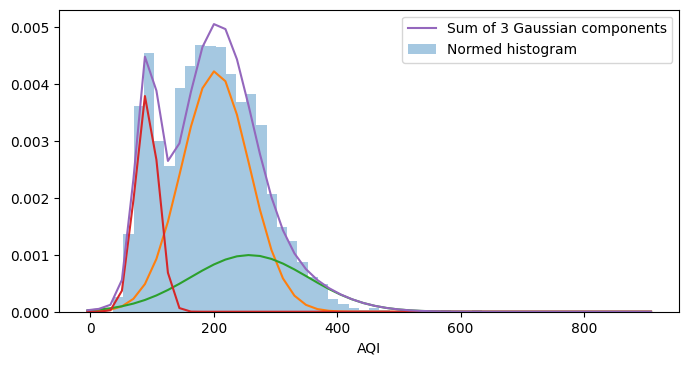

In [ ]:
from sklearn.mixture import GaussianMixture

plt.figure(dpi=100, figsize=(8, 4))
dist = sns.distplot(df['AQI'], kde=False, norm_hist=True, label=f'Normed histogram')

# Plot fitted distribution
x = np.linspace(*dist.get_xlim())

gm = GaussianMixture(n_components=3).fit(df[['AQI']])
estims = []
for n in range(gm.n_components):
  estim = norm.pdf(x, gm.means_[n], np.sqrt(gm.covariances_[n])) * gm.weights_[n]
  dist.plot(x, estim[0])
  estims.append(estim[0])
dist.plot(x, np.sum(estims, axis=0), label=f'Sum of {gm.n_components} Gaussian components')
dist.legend()

In [ ]:
gamma_vars = ['NOx', 'NO', 'NO2']

## Step 5. Estimate parameters of chosen distributions using methods of maximum likelihood and least squares method.



In [ ]:
# Calculate statistics
log_mean = df[gamma_vars].mean().apply(np.log)
mean_log = df[gamma_vars].apply(np.log).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither

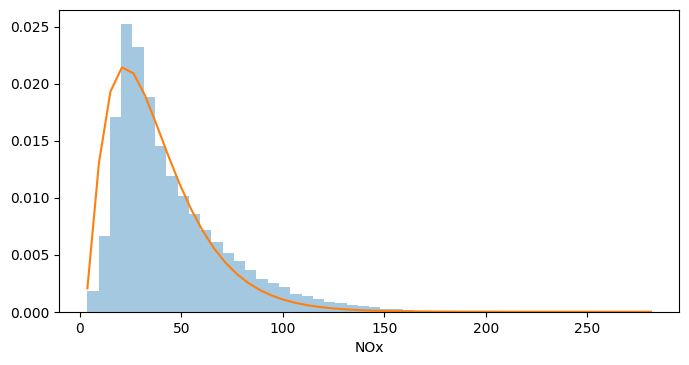

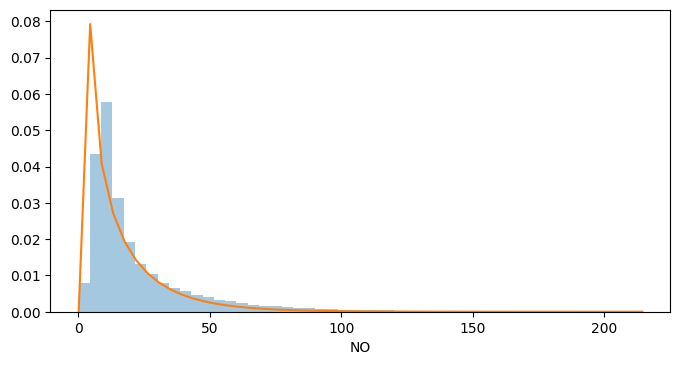

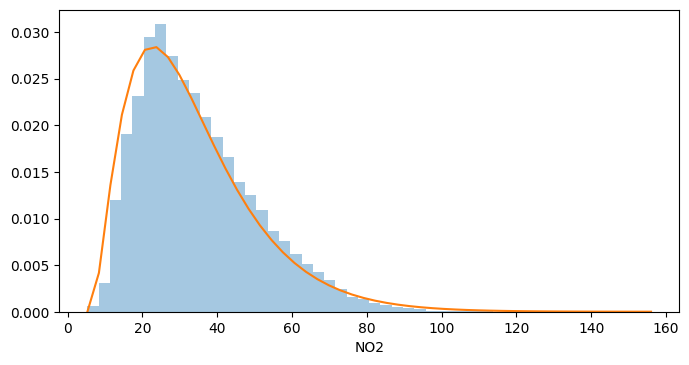

In [ ]:
from scipy.optimize import least_squares

params_mls = {}

n_bins=bins

for var in gamma_vars:

  curr_bins = np.linspace(df[var].min(), df[var].max(), n_bins)

  histogram = np.histogram(df[var], curr_bins, normed=True)[0]

  def residuals(params):
    return histogram - gamma.pdf(curr_bins[:-1], *params)

  params = least_squares(
      residuals,
      x0=[alpha_mom[var], 1, beta_mom[var]]
      )['x']

  params_mls[var] = params

  # Plot fitted distribution
  fig = plt.figure()
  fig.set_dpi(100)
  fig.set_figheight(4)
  fig.set_figwidth(8)

  dist = sns.distplot(df[var], kde=False, norm_hist=True, label=f'Normed histogram')

  x = np.linspace(*dist.get_xlim())  
  x = np.linspace(df[var].min(), df[var].max())

  dist.plot(x, gamma.pdf(x, *params))


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

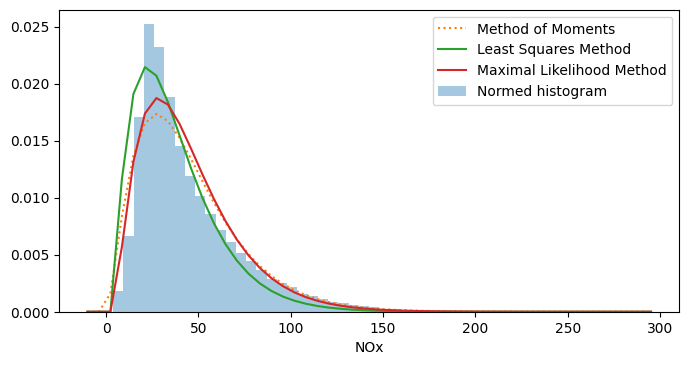

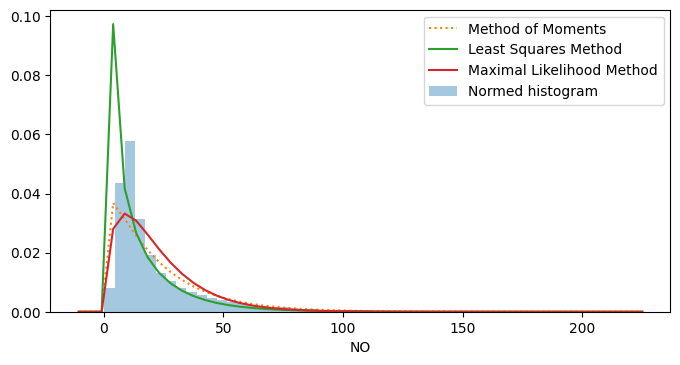

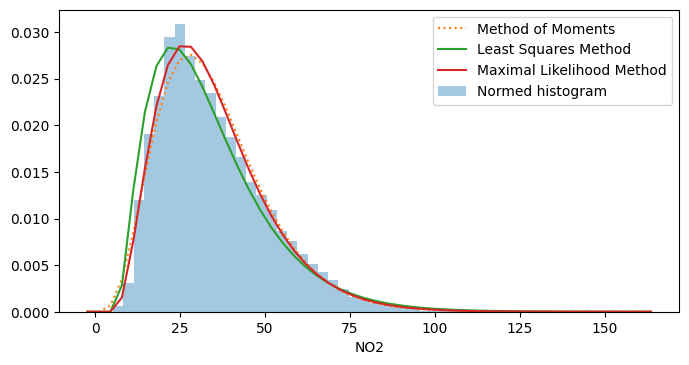

In [ ]:
params_mle = {}

for var in gamma_vars:
  fig = plt.figure()
  fig.set_dpi(100)
  fig.set_figheight(4)
  fig.set_figwidth(8)

  dist = sns.distplot(df[var], kde=False, norm_hist=True, label='Normed histogram')

  x = np.linspace(*dist.get_xlim())
  dist.plot(x, gamma.pdf(x, *params_mom[var]), ':', label='Method of Moments')
  dist.plot(x, gamma.pdf(x, *params_mls[var]), label='Least Squares Method')


  mle_params = gamma.fit(df[var])
  params_mle[var] = mle_params

  dist.plot(x, gamma.pdf(x, *mle_params), label=f'Maximal Likelihood Method')


  dist.legend()

## Step 6. Validate your estimated parameters using QQ biplots



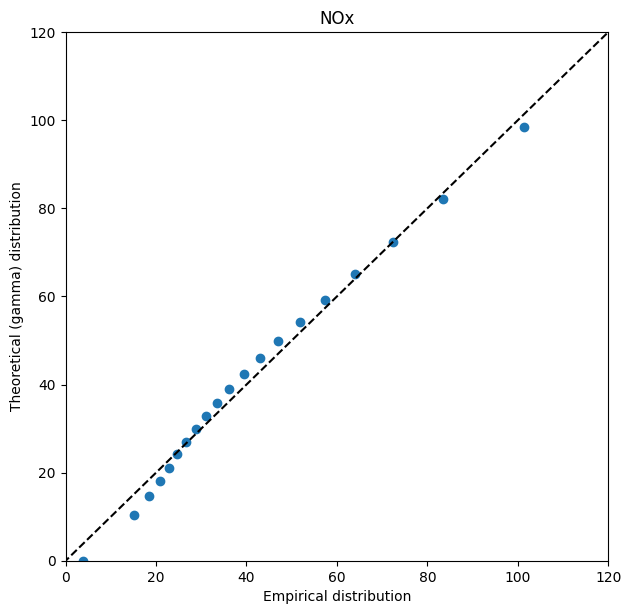

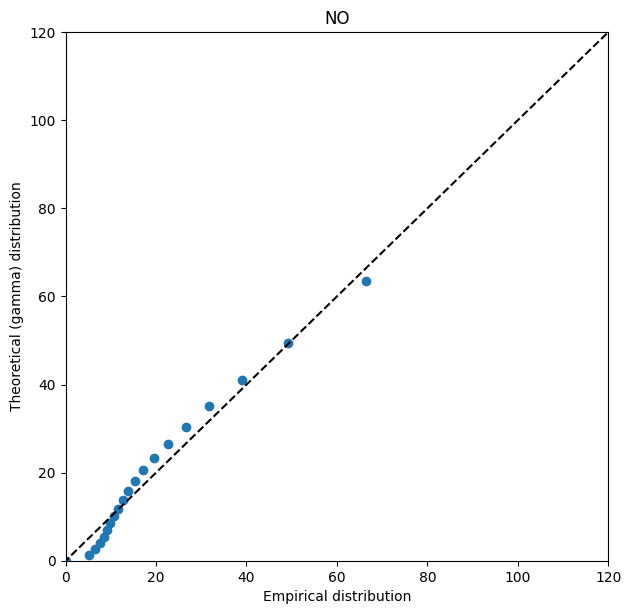

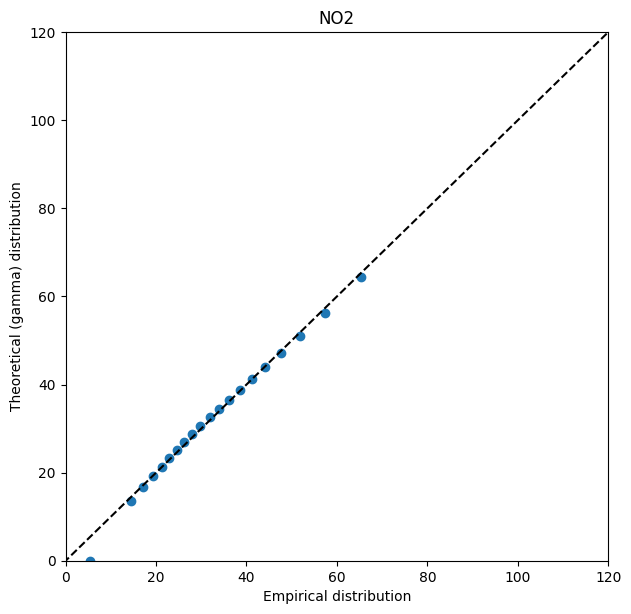

In [ ]:
# Plotting a quantile biplot for empirical and theoretical (gamma) distribution
for var in gamma_vars:
  # Calculation of quantiles
  params = params_mom[var]

  percs = np.linspace(0, 100, 21)
  qn_empirical = np.percentile(df[var], percs)
  qn_theoretical = gamma.ppf(percs / 100.0, *params)

  # Building a quantile biplot
  plt.figure(figsize=(7, 7), dpi=100)
  plt.plot(qn_empirical, qn_theoretical, ls="", marker="o", markersize=6)
  plt.plot(x, x, color="k", ls="--")
  plt.xlim(0, 120)
  plt.ylim(0, 120)
  plt.xlabel(f'Empirical distribution')
  plt.ylabel('Theoretical (gamma) distribution')
  plt.title(var)

  plt.show()

## Step 7. Estimate correctness of fitted distributions using at least 2 statistical tests

In [ ]:
# !pip install scipy==1.6.0

In [ ]:
from scipy.stats import kstest, cramervonmises

tests = [kstest, cramervonmises]
for var in gamma_vars:
  test_res = '\n'.join([str(test(df[var], 'gamma', params_mom[var])) for test in tests])
  print(f'{var}:\n{test_res}\n===')



NOx:
KstestResult(statistic=0.05866984116648977, pvalue=1.5098488349140006e-144)
CramerVonMisesResult(statistic=49.44908845140381, pvalue=8.828421771411854e-09)
===
NO:
KstestResult(statistic=0.14238616557092487, pvalue=0.0)
CramerVonMisesResult(statistic=239.5455795722319, pvalue=5.809711722815081e-08)
===
NO2:
KstestResult(statistic=0.02547574921515272, pvalue=1.3793623882669635e-27)
CramerVonMisesResult(statistic=8.251075621743931, pvalue=4.7831960614530544e-11)
===


In [ ]:
# gm = GaussianMixture(n_components=3).fit(df[['AQI']])
# estims = []
def trimodal_cdf(x, mean1, mean2, mean3, cov1, cov2, cov3, weight1, weight2, weight3):
  return norm.cdf(x, mean1, np.sqrt(cov1)) * weight1 + norm.cdf(x, mean2, np.sqrt(cov2)) * weight2 + norm.cdf(x, mean3, np.sqrt(cov3)) * weight3

test_res = '\n'.join([str(test(df['AQI'], trimodal_cdf, (*gm.means_, *gm.covariances_, *gm.weights_))) for test in tests])
print(f'AQI:\n{test_res}\n===')


AQI:
KstestResult(statistic=0.9999999999797812, pvalue=0.0)
CramerVonMisesResult(statistic=3.739057137401347, pvalue=1.8313814909021175e-09)
===
